In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,accuracy_score,recall_score,mean_squared_error,confusion_matrix,classification_report,roc_auc_score,f1_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import logging
import warnings
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint as sp_randint
from google.colab import drive
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [310]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
import category_encoders

In [ ]:
pd.set_option("display.max_columns", 100)



In [312]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [313]:
df=pd.read_csv('/content/drive/MyDrive/AI/Train_Set_TVS.csv')
dftest=pd.read_csv('/content/drive/MyDrive/AI/Test_Set_TVS.csv')



In [314]:
print(df.shape)
print(dftest.shape)

(132440, 33)
(56760, 32)


In [315]:
df.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [ ]:
df['Default'].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

In [357]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

## DataProcessing functions

In [ ]:
## method to replace null values
def removeNull(data):
    #check for empty or null values
    for col in data.columns:
        data[col]=data[col].replace(r'^\s*$', np.NaN, regex=True)
        if data[col].isnull().sum().sum()>0:
           
            
           # print(data[col].dtype.name)
            if (data[col].dtype.name == 'object' or data[col].dtype.name == 'category' ):
                    print("Replacing the {0} data with  mode (for categorical type values)".format(col))
                    mode_value=data[col].mode().iloc[0]
                 
                    data[col]= data[col].fillna(mode_value)
            else:
                    print("Replacing the {0} data with mean(for float type) ".format(col))
                    median_value=data[col].mean()
                    data[col]= data[col].fillna(median_value)
    return(data)


            

In [ ]:
def convertCategoryfeature(data):
    for col in data.columns:
        if data[col].dtype.name=='object' :
            data[col]=pd.Categorical(data[col])

    return data


In [ ]:
def normalizeData(xtraindata,xtestdata):
    cols=[]
    impcols=xtraindata.columns
    
    for col in impcols:
          if xtraindata[col].dtype.name=='float64':
              cols.append(col)
    print(cols)
    minmax=MinMaxScaler()
    x_traindata=pd.DataFrame(minmax.fit_transform(xtraindata))
    x_traindata.columns=xtraindata.columns
    x_testdata=pd.DataFrame(minmax.fit_transform(xtestdata))
    x_testdata.columns=xtestdata.columns
    return(x_traindata,x_testdata)


In [ ]:
df['Company_Rating'].unique()
#c=category_encoders.OrdinalEncoder('Prop_List')
#d = c.fit_transform(df)

<IntegerArray>
[2, 1, 3]
Length: 3, dtype: Int64

In [ ]:
def OnehotEncoding(data):
    #cols=['Prop_List','Credit_Inq','Credit_Lnks']
    data['Prop_List']=data['Prop_List'].replace({'None':0,'One':1,'Morethan_One':2})
    data['Prop_List']=data['Prop_List'].astype('int64')

    data['Credit_Lnks']=data['Credit_Lnks'].replace({'1_to_3':1,'4_to_6':2, '>6':3})
    data['Credit_Lnks']=data['Credit_Lnks'].astype('int64')

    data['Credit_Inq']=data['Credit_Inq'].replace({'1':1, '2':2, '3':3, '>4':4})
    data['Credit_Inq']=data['Credit_Inq'].astype('int64')

    #data['Default']=data['Default'].astype('int64')


    cols=['Prop_List','Credit_Inq','Credit_Lnks']
   # encoder = category_encoders.OrdinalEncoder(data.columns)
    #data = encoder.fit_transform(data)
    #data.head(2)
    #datatemp=data.drop(['Prop_List','Credit_Inq','Credit_Lnks','Default'],axis=1)

    data=pd.get_dummies(data,drop_first=True)
    
    return data


In [ ]:
def balanceData(x,y):
    oversample = SMOTE()
    print('Smote')
    x, y = oversample.fit_resample(x, y)
    return (x,y)


In [ ]:
def preprocessing_data(data):
    #Remove null values
    print('convert all object features as categorical')

    data=convertCategoryfeature(data)
    print('Replace Null')
    data=removeNull(data)
    #data=data.dropna()
    #convert all object features as categorical
   
    #Drop customer ID as it is not required
    data=data.drop('ID',axis=1)
    #encode categorical features
    print('Remove outlier')
    data=remove_outliers(data)
    print('Onehot Encoding')

    data=OnehotEncoding(data)
    #data=remove_outliers(data)
    return data

In [ ]:
def trainModels(xtrn,ytrn,xtest,ytest,model,algorithm):
    result=[]
    ytrn=ytrn.values.ravel()
    model.fit(xtrn, ytrn)
    y_pred = model.predict(xtest)
   
    #Accuracy Score
    testacc= accuracy_score(ytest,y_pred)
    y_predtrn = model.predict(xtrn)
    trainacc=accuracy_score(ytrn,y_predtrn)
    #mean_squared_error
    mse=mean_squared_error(ytest,y_pred)
    #Pecision score
    precision = precision_score(ytest, y_pred )
    #RecallScore
    recall = recall_score(ytest, y_pred )
    #f1 Score
    f1 = f1_score(ytest, y_pred )
    #auc roc score
    auc=roc_auc_score(ytest, y_pred)
    result = pd.DataFrame({'Method':[algorithm],'Test_accuracy': round(testacc,2),'Train_accuracy':round(trainacc,2),'MSE':round(mse,2),'auc':round(auc,2),'Precision':round(precision,2),'Recall':round(recall,2),'f1':round(f1,2)})
   
    return(result)

In [ ]:
def plotChart(data,gType):
   
    lstCategories=[]
    for col in data.columns:
        if ((data[col].dtype.name=='category') or (data[col].dtype.name=='object') ) :
            lstCategories.append(col)
    print(lstCategories)
    fig = plt.figure(figsize=(30,40)) 
    irange=len(lstCategories)
    i= 0 
    r,c = 0 ,0  
    for i in range(irange):
        if c < 2:
            
            ax1 = plt.subplot2grid((12,4), (r, c))
            if gType=='pie':
                plt.pie(df[lstCategories[i]].value_counts() , labels =df[lstCategories[i]].unique() , autopct='%.0f%%')
                plt.title(lstCategories[i])
            elif gType=='countplot':
                 sns.countplot(  x=df[lstCategories[i]],hue=df['Default'], ax=ax1)
            c +=1
            i+=1
            
        else:
            c = 0 
            r += 1 
            ax1 = plt.subplot2grid((12,4), (r, c))
            if gType=='pie':
                plt.pie(df[lstCategories[i]].value_counts() , labels = df[lstCategories[i]].unique() , autopct='%.0f%%')
                plt.title(lstCategories[i])

            elif gType=='countplot':
                 sns.countplot(  x=df[lstCategories[i]],hue=df['Default'],ax=ax1)
            c +=1
            i+=1
           # r+=1
    plt.show()   


In [ ]:
def prepare_data(data):
    X=pd.DataFrame(data.drop(targetcolumn,axis=1))
    y=pd.DataFrame(data[targetcolumn].astype(np.float64))
    print('Balancing data using SMOTE: ')

    X,y=balanceData(X,y)
    #Feature selection
    #Select top 20 features based on importance score
    print('Selecting feature based on importance score')
    feature_imp=feature_selection(X,y)
    feature_imp.reset_index(level=0, inplace=True)
    feature_imp=feature_imp.head(30)
    col=feature_imp['index']
   
    feature_cols=[]
    for i in col:
        feature_cols.append(i)
   
    X=X[feature_cols]
    print('Selected feature columns: ',X.columns)
  
    #Balance data
   # print('Balancing data using SMOTE: ')

  #  X,y=balanceData(X,y)
    #Split data
    print('Spliting data ')

    x_train,x_test,y_train,y_test= splitData(X,y) 
    #Normalize data
    print('Normalize data ')
    print(x_train.isnull().sum())
    x_train,x_test=normalizeData(x_train,x_test)
    return  (x_train,x_test,y_train,y_test)


In [ ]:
def feature_selection(x,y):
    mod=DecisionTreeClassifier()
    mod.fit(x,y)
    feature_imp=pd.DataFrame(mod.feature_importances_, columns = ["Imp"], index = x.columns)
    feature_imp=feature_imp.sort_values('Imp',ascending=False)
    
    return feature_imp

In [ ]:
def splitData(X,y):
   # X=pd.DataFrame(data[featureCols])
   # y=pd.DataFrame(data[targetCol])
    y=y.astype('int')

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1)
    return x_train,x_test,y_train,y_test

In [ ]:
def evaluate_model(models,x_train,y_train,x_test,y_test):
    results=pd.DataFrame()
    cv_results=pd.DataFrame()
    scoring = 'accuracy'
    kfold = model_selection.KFold(n_splits=10)
    for md in models.keys():
        model=models.get(md)

        rs=trainModels(x_train,y_train,x_test,y_test,model,md)
        results=pd.concat([results, rs])
        print(md)
        #print(results)
    results=results.sort_values("f1",ascending=False)
    print("--------------------- Model performances -------------------")
    print(results.to_string(index=False)) 
   
    return results.iloc[0]

In [ ]:
def remove_outliers(data):
    for col in data.columns :
      if (col!='Default'):
        if data[col].dtype.name=='float64' :#or data[col].dtype.name=='int64' :
            q1=data[col].quantile(0.25)
            q3=data[col].quantile(0.75)
            iqr=(q3-q1)
            low=q1-(1.5 * iqr)
            high=q3+(1.5 * iqr)
            data.loc[(data[col]>high),col]=high
            data.loc[ (data[col]<low),col]=low
    return data

In [ ]:
df.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


## 1 Data Cleaning

In [ ]:
df['Credit_Inq'].unique()


array(['1', '2', '3', '>4', nan], dtype=object)

In [ ]:
df['Credit_Inq']=df['Credit_Inq'].astype('category')

In [ ]:
df['hour_Process'].unique()


array([10., 12.,  5., 16., 14.,  9.,  8., 11., 13., 15.,  6., 18., 20.,
       17.,  7., 19.,  2.,  3.,  1.,  4.,  0., 22., 21., 24., 23., 25.])

In [ ]:
df = df.drop (df.index[df ['hour_Process'] == 25])
df['hour_Process']=df['hour_Process'].replace([24],0) 
#d#f['hour_Process']=df['hour_Process'].astype('Int64')
#df['hour_Process']=df['hour_Process'].astype('category')

#df['Company_Rating']=df['Company_Rating'].astype('Int64')
#df['Product_bought']=df['Product_bought'].astype('Int64')
#df['Contact_age']=df['Contact_age'].astype('Int64')


#df['Credit_Inq']=df['Credit_Inq'].astype('category')
#df['Age']=df['Age'].astype('Int64')
df['Home_Appliances']=df['Home_Appliances'].astype(np.int64)
#df['Dependents']=df['Dependents'].astype('Int64')
#df['Default']=df['Default'].astype('Int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132435 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132435 non-null  int64  
 1   Compensation        126193 non-null  float64
 2   Vehicle_Status      123332 non-null  object 
 3   Loan_amt            132435 non-null  float64
 4   Annuity_amt         127824 non-null  float64
 5   density_Ind         127019 non-null  float64
 6   Job_Type            122187 non-null  object 
 7   Default_hist        132435 non-null  object 
 8   Prop_List           130470 non-null  object 
 9   Home_Appliances     121471 non-null  float64
 10  Region_Type         132435 non-null  object 
 11  Credit_Inq          129746 non-null  object 
 12  Education_det       132435 non-null  object 
 13  Marital_Stat        132435 non-null  object 
 14  Gen                 132435 non-null  object 
 15  Credit_Lnks         132435 non-nul

###hour_Process is a categorical variable. There is an anomaly 25, we need to  remove the rows 

In [ ]:
converteddata=preprocessing_data(df)

convert all object features as categorical
Replace Null
Remove outlier
Onehot Encoding


In [ ]:
converteddata.isnull().sum().sum()

0

In [ ]:
converteddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132435 entries, 0 to 132439
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Compensation            132435 non-null  float64
 1   Loan_amt                132435 non-null  float64
 2   Annuity_amt             132435 non-null  float64
 3   density_Ind             132435 non-null  float64
 4   Prop_List               132435 non-null  int64  
 5   Home_Appliances         132435 non-null  int64  
 6   Credit_Inq              132435 non-null  int64  
 7   Credit_Lnks             132435 non-null  int64  
 8   Experience              132435 non-null  float64
 9   Dependents              132435 non-null  float64
 10  Company_Rating          132435 non-null  float64
 11  Age                     132435 non-null  float64
 12  hour_Process            132435 non-null  float64
 13  c1_rated                132435 non-null  float64
 14  c2_rated            

In [ ]:
converteddata.head(5)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Prop_List,Home_Appliances,Credit_Inq,Credit_Lnks,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Region_Type_Rural,Region_Type_other,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,801850.0,658040.0,13816.52,0.0304,2,3,1,1,0.900000,3.0,2.0,46.0,10.0,0.077000,0.077,18.0,2.0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,884222.0,198075.0,11173.06,0.0194,2,1,2,1,3.000000,3.0,2.0,46.0,12.0,0.184000,0.184,306.0,4.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1
2,284120.0,101056.0,8390.40,0.0118,1,4,3,1,6.580481,2.0,2.0,57.0,5.0,0.538000,0.538,281.0,4.0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1
3,341874.0,179008.0,7184.13,0.0373,0,2,1,1,4.700000,4.0,2.0,39.0,12.0,0.505929,0.561,20.0,4.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1
4,1259895.0,573715.0,13212.77,0.0138,2,1,2,2,6.900000,3.0,2.0,32.0,16.0,0.505929,0.200,2339.0,6.0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1


## 2 Exploratory Data Analyis

In [ ]:
df.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Age,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132435.000000,1.324350e+05,1.324350e+05,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000,132435.000000
mean,488938.364247,7.450480e+05,4.148030e+05,10845.294617,0.020446,3.220884,6.580481,2.155472,43.933288,0.505929,0.506180,979.417164,3.387752,0.264303
std,58568.991124,4.590629e+05,2.746765e+05,2025.324011,0.014765,1.189240,5.808895,0.909055,11.962775,0.250271,0.254844,803.667422,2.173261,0.440963
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.000000,5.251660e+05,2.045340e+05,9405.310000,0.010800,2.000000,2.500000,2.000000,34.000000,0.289000,0.283000,318.000000,2.000000,0.000000
50%,488952.000000,6.827200e+05,3.495450e+05,10845.294617,0.020446,4.000000,6.100000,2.000000,43.000000,0.505929,0.506180,855.000000,3.000000,0.000000
75%,539705.500000,8.657610e+05,5.582060e+05,12107.765000,0.030000,4.000000,7.900000,3.000000,54.000000,0.747000,0.754000,1546.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,69.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


Data is not in same scale.There are outliers.

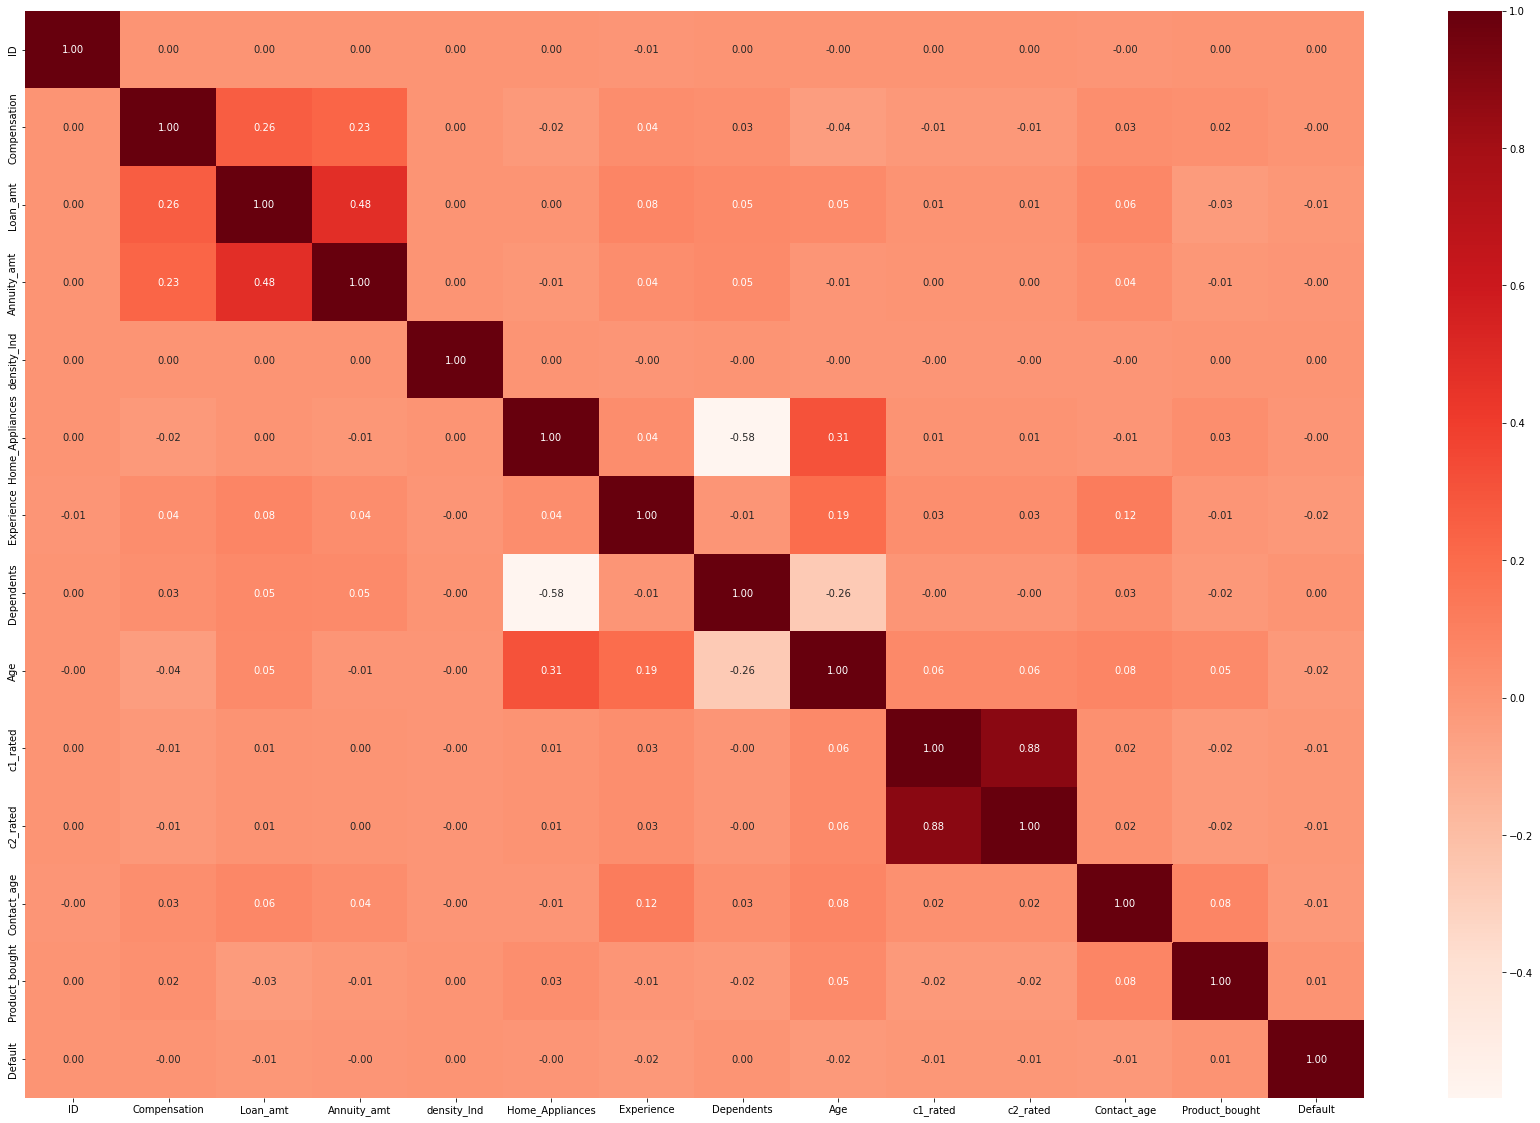

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

c1_rated and c2_rated are highly correlated and Dependents and Home_appliance is correlated. We will drop C2_rated and Dependents

In [ ]:
converteddata=converteddata.drop(['c2_rated','Dependents'],axis=1)

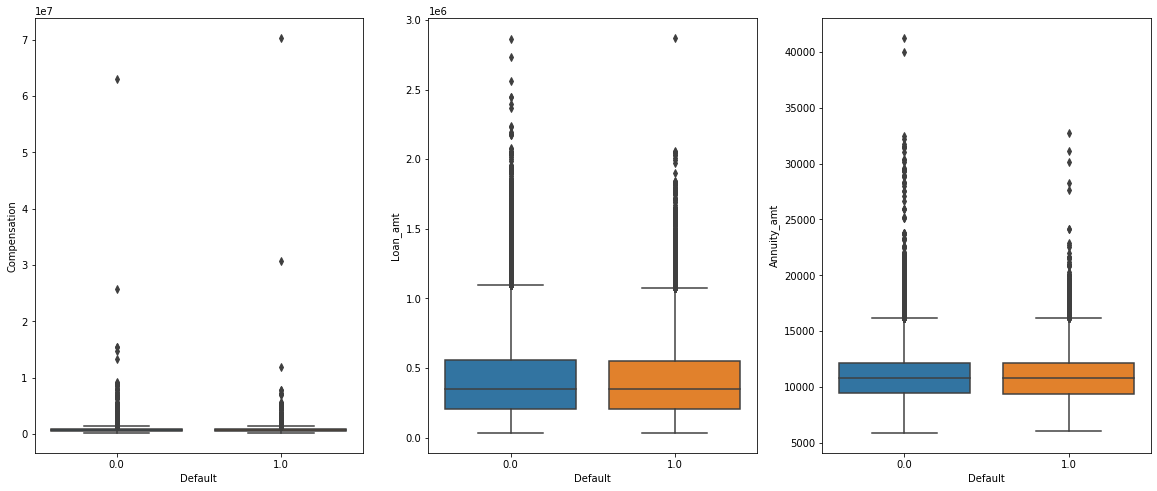

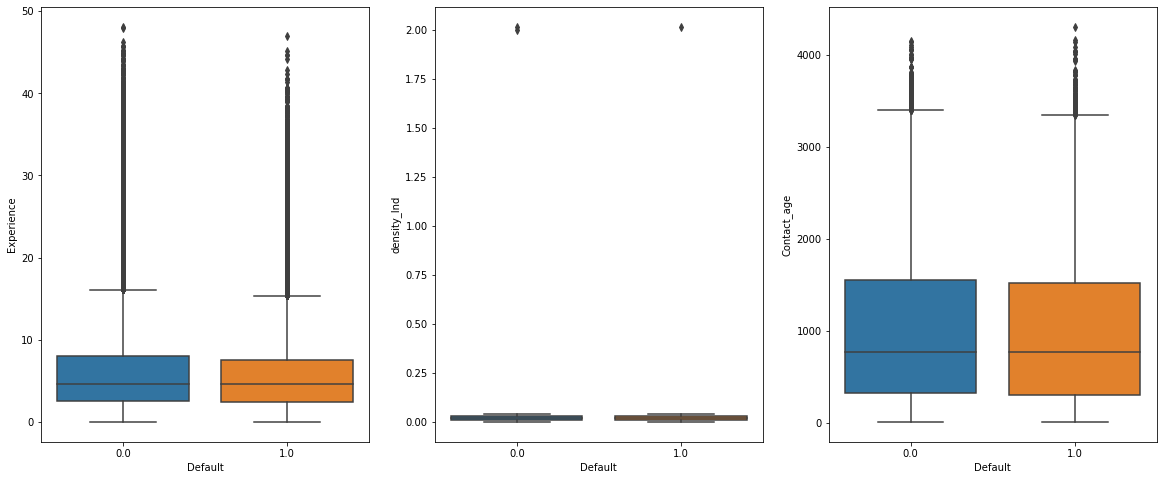

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,8))
sns.boxplot(ax=axes[0],data=df,x='Default',y='Compensation')


sns.boxplot(ax=axes[1],data=df,x='Default',y='Loan_amt')
sns.boxplot(ax=axes[2],data=df,x='Default',y='Annuity_amt')
fig,axes=plt.subplots(1,3,figsize=(20,8))

sns.boxplot(ax=axes[0],data=df,x='Default',y='Experience')
#sns.boxplot(ax=axes[1],data=df,x='Default',y='hour_Process')
sns.boxplot(ax=axes[1],data=df,x='Default',y='density_Ind')
sns.boxplot(ax=axes[2],data=df,x='Default',y='Contact_age')


['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Company_Rating', 'Region', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag']


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


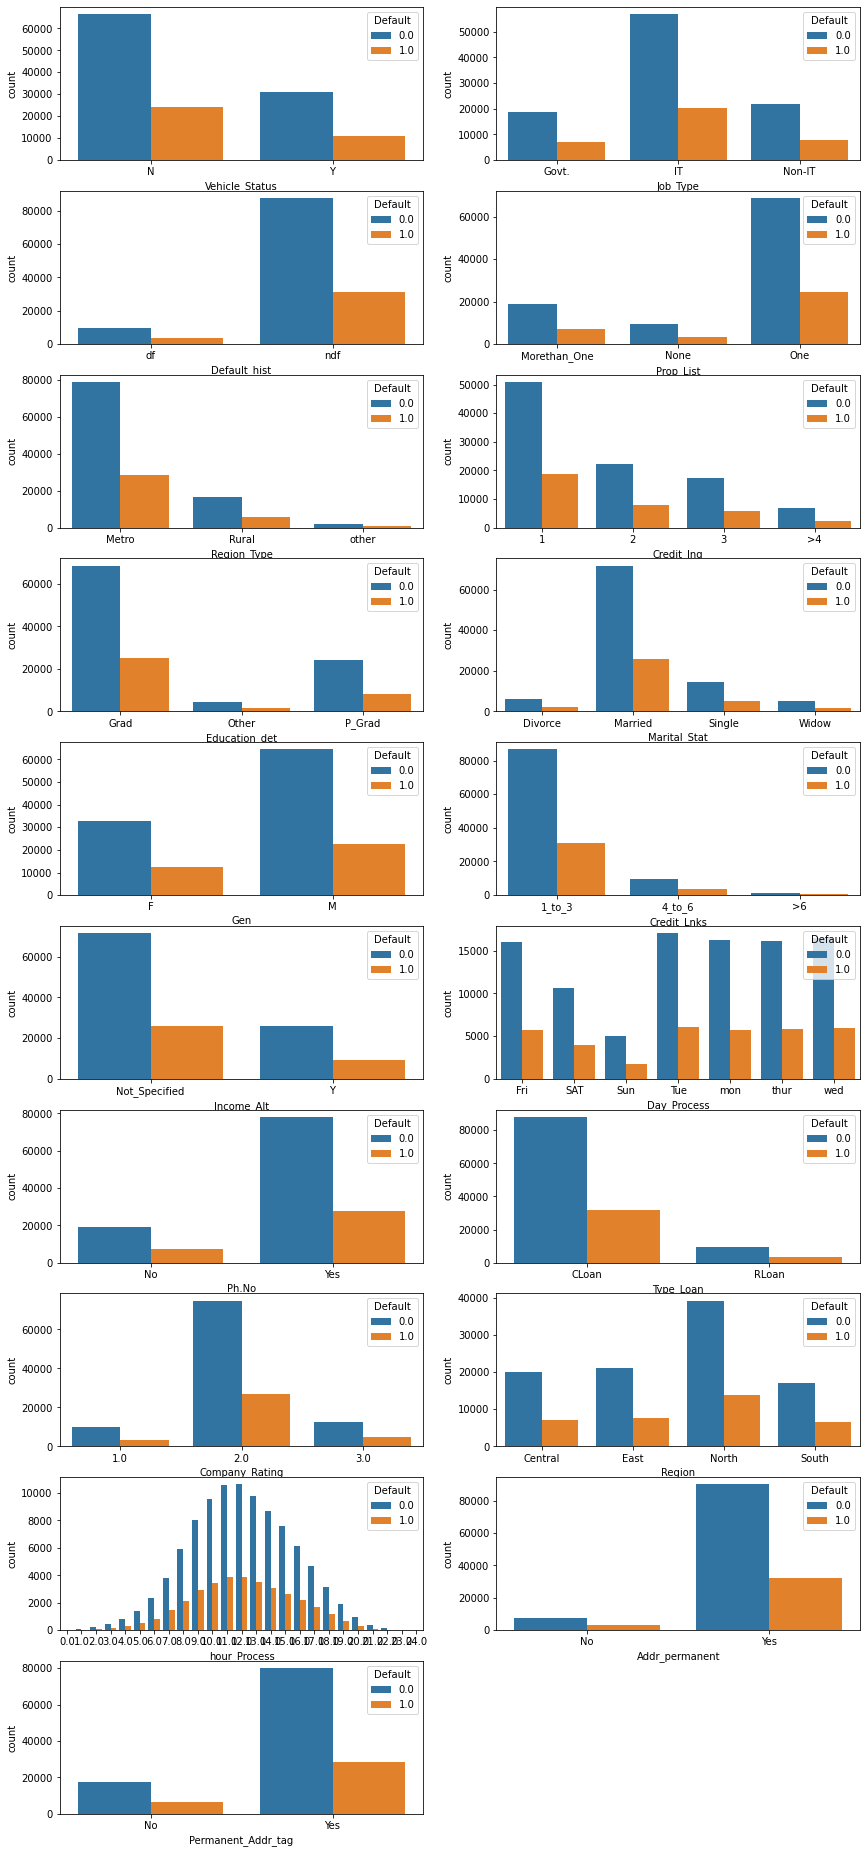

In [ ]:
plotChart(df,'countplot')

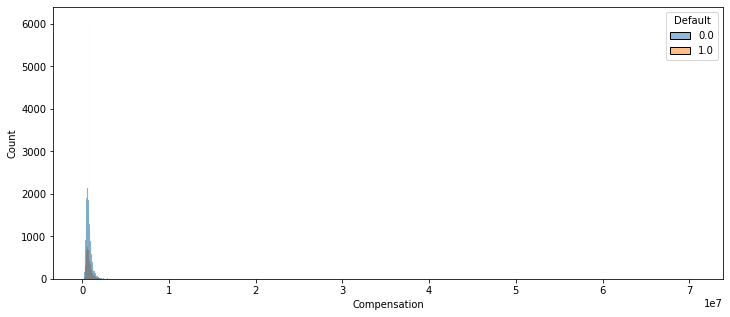

In [364]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Compensation', hue='Default')

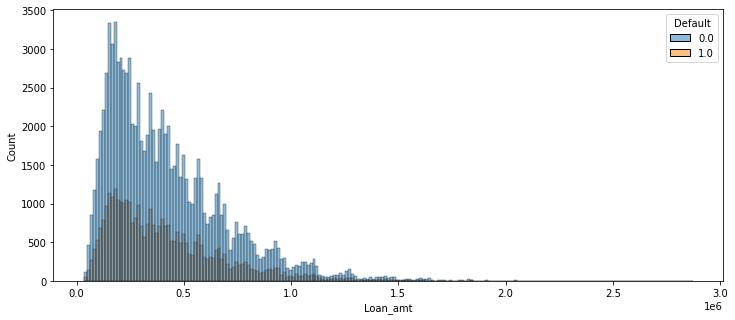

In [365]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Loan_amt', hue='Default')

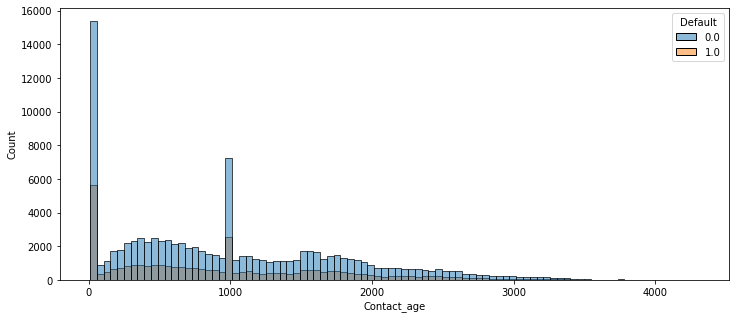

In [363]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Contact_age', hue='Default')

### Observation
Applicants with job title  IT tends to defaults most.
Applicants with No Default history have higher change to default
Applicants with ony one property have higher chance to default
Applicant from Metro have higher chance to default
History with one credit Inquery have higher chance to default
applocants with 1to 3 Credit_Lnks tend to default


In [ ]:
sns.histplot(df, binwidth=5)


###There are outliers.We shouldnot remove as the informations are important

## 3. Model Building

In [ ]:
converteddata['Default'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [ ]:
converteddata.isnull().sum().sum()

0

In [ ]:
converteddata.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Prop_List',
       'Home_Appliances', 'Credit_Inq', 'Credit_Lnks', 'Experience',
       'Dependents', 'Company_Rating', 'Age', 'hour_Process', 'c1_rated',
       'c2_rated', 'Contact_age', 'Product_bought', 'Default',
       'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Non-IT',
       'Default_hist_ndf', 'Region_Type_Rural', 'Region_Type_other',
       'Education_det_Other', 'Education_det_P_Grad', 'Marital_Stat_Married',
       'Marital_Stat_Single', 'Marital_Stat_Widow', 'Gen_M', 'Income_Alt_Y',
       'Day_Process_SAT', 'Day_Process_Sun', 'Day_Process_Tue',
       'Day_Process_mon', 'Day_Process_thur', 'Day_Process_wed', 'Ph.No_Yes',
       'Type_Loan_RLoan', 'Region_East', 'Region_North', 'Region_South',
       'Addr_permanent_Yes', 'Permanent_Addr_tag_Yes'],
      dtype='object')

In [ ]:

converteddata['hour_Process']=converteddata['hour_Process'].astype(np.int64)
#df['hour_Process']=df['hour_Process'].astype('category')

converteddata['Company_Rating']=converteddata['Company_Rating'].astype(np.int64)
converteddata['Product_bought']=converteddata['Product_bought'].astype(np.int64)
converteddata['Contact_age']=converteddata['Contact_age'].astype(np.int64)


#df['Credit_Inq']=df['Credit_Inq'].astype('category')
converteddata['Age']=converteddata['Age'].astype(np.int64)
converteddata['Home_Appliances']=converteddata['Home_Appliances'].astype(np.int64)
converteddata['Dependents']=converteddata['Dependents'].astype(np.int64)
#df['Default']=df['Default'].astype('Int64')


In [ ]:
targetcolumn='Default'
x_train,x_test,y_train,y_test=prepare_data(converteddata)


Balancing data using SMOTE: 
Smote
Selecting feature based on importance score
Selected feature columns:  Index(['Region_South', 'density_Ind', 'Contact_age', 'Compensation',
       'Experience', 'Loan_amt', 'Annuity_amt', 'c2_rated', 'Region_East',
       'c1_rated', 'Age', 'hour_Process', 'Credit_Inq', 'Product_bought',
       'Region_North', 'Home_Appliances', 'Dependents', 'Prop_List',
       'Job_Type_IT', 'Vehicle_Status_Y', 'Day_Process_SAT', 'Day_Process_wed',
       'Marital_Stat_Single', 'Day_Process_thur', 'Day_Process_mon',
       'Job_Type_Non-IT', 'Day_Process_Tue', 'Education_det_P_Grad', 'Gen_M',
       'Marital_Stat_Married'],
      dtype='object')
Spliting data 
Normalize data 
Region_South            0
density_Ind             0
Contact_age             0
Compensation            0
Experience              0
Loan_amt                0
Annuity_amt             0
c2_rated                0
Region_East             0
c1_rated                0
Age                     0
hour_Proc

In [ ]:
y_train.head(5)

,Default
135447,1
186831,1
111340,1
96633,1
48958,0


## Model 1

In [ ]:
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100,200, 500]
   }


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, np.ravel(y_train))
print(CV_rfc.best_params_)

In [ ]:
rfc=RandomForestClassifier(   criterion = 'entropy', class_weight='balanced',  max_depth = 64, min_samples_leaf=3)
rfc.fit(x_train, np.ravel(y_train))

rfc_y_pred = rfc.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in rfc_y_pred])
print('precision ={}'.format(precision_score(y_test,rfc_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,rfc_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,rfc_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, rfc_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, rfc_y_pred)))
print(classification_report(y_test, rfc_y_pred))
    
cm = confusion_matrix(y_test, rfc_y_pred)
print('Confusion matrix')
print(cm)

precision =0.9230414392250327
accuracy =0.7879557642470428
recall =0.6230733302195236
F1 Score =0.7439583591523113
ROC AUC Score=0.7861357312892178
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     19704
           1       0.92      0.62      0.74     19269

    accuracy                           0.79     38973
   macro avg       0.82      0.79      0.78     38973
weighted avg       0.82      0.79      0.78     38973

Confusion matrix
[[18703  1001]
 [ 7263 12006]]


## Model 2

In [ ]:
logreg=LogisticRegression()
parameters = [ 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, np.ravel(y_train))   


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000]}])

In [ ]:
grid_search.best_params_

{'C': 10}

In [ ]:
grid_search.best_score_

0.7299370828636838

<bound method BaseEstimator.get_params of LogisticRegression()>

In [ ]:
lgc=LogisticRegression(C=100)
lgc.fit(x_train, y_train)

lgc_y_pred = lgc.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in lgc_y_pred])
print('precision ={}'.format(precision_score(y_test,lgc_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,lgc_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,lgc_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, lgc_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, lgc_y_pred)))
print(classification_report(y_test, lgc_y_pred))
    
cm = confusion_matrix(y_test, lgc_y_pred)
print('Confusion matrix')
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision =0.8664942157074083
accuracy =0.7673260975547174
recall =0.6258238621620219
F1 Score =0.7267522449225579
ROC AUC Score=0.7657641438296914
              precision    recall  f1-score   support

           0       0.71      0.91      0.80     19704
           1       0.87      0.63      0.73     19269

    accuracy                           0.77     38973
   macro avg       0.79      0.77      0.76     38973
weighted avg       0.79      0.77      0.76     38973

Confusion matrix
[[17846  1858]
 [ 7210 12059]]


## Model 3

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }
xgb_grd_param={'learning_rate': [0.4,0.5],
        'max_depth': [6,7]
    }
#clf = RandomizedSearchCV(xgb_model, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)
clf = GridSearchCV(estimator=xgb_model,param_grid= xgb_grd_param, cv= 5)
clf.fit(x_train, np.ravel(y_train))
print(clf.best_params_)

#zxgb_model.fit(x_train, y_train, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)


In [ ]:
clf.best_params_

{'learning_rate': 0.4, 'max_depth': 6}

In [ ]:
xgb_model =xgb.XGBClassifier(learning_rate=0.4, max_depth= 6)
 #xgb.XGBClassifier(colsample_bytree= 0.9032147310861266,
 #learning_rate= 0.32733210006359886,
 #max_depth= 8,
 #min_child_weight= 2,
 #n_estimators= 945,
 #subsample= 0.6369022953371541)#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")

xgb_model.fit(x_train, np.ravel(y_train))#, early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

xgb_y_pred = xgb_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in xgb_y_pred])
print('precision ={}'.format(precision_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,xgb_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,xgb_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, xgb_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, xgb_y_pred)))
print(classification_report(y_test, xgb_y_pred))
    
cm = confusion_matrix(y_test, xgb_y_pred)
print('Confusion matrix')
print(cm)

precision =0.7123432542680164
accuracy =0.721961357863136
recall =0.7340806476724272
F1 Score =0.7230486121760467
ROC AUC Score=0.7220951350420601
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     19704
           1       0.71      0.73      0.72     19269

    accuracy                           0.72     38973
   macro avg       0.72      0.72      0.72     38973
weighted avg       0.72      0.72      0.72     38973

Confusion matrix
[[13992  5712]
 [ 5124 14145]]


## Model 4

In [ ]:
lgbmodel = lgb.LGBMClassifier()#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],

             }
lgb_grd_param={'learning_rate': [0.01,0.03,.1,0.4,0.5],
        'max_depth': [4,6,7]}
clf = RandomizedSearchCV(lgbmodel, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
numFolds = 5
#kfold_5 = KFold(shuffle = True, n_splits = numFolds)
#clf = GridSearchCV(estimator=lgbmodel,param_grid= lgb_grd_param, cv= 5)
clf.fit(x_train, np.ravel(y_train))
print(clf.best_params_)


In [ ]:
#lgm_model =lgb.LGBMClassifier(colsample_bytree= 0.7949951580157151, learning_rate= 0.08330626670329541,max_depth= 4, min_child_weight= 2, n_estimators= 496, subsample= 0.7419145863951754)#colsample_bytree= 0.5548373185268561, learning_rate= 0.037987079408496834, max_depth= 4, min_child_weight= 1, n_estimators= 854, subsample= 0.7605763851013588) #lgb.LGBMClassifier(colsample_bytree= 0.8738454250096039, learning_rate= 0.35244106032605377, max_depth= 3, min_child_weight= 2, n_estimators= 221, subsample= 0.8620625458537563)#(num_leaves=5,n_estimators=200,learning_rate=.1)#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")#lgb.LGBMClassifier(learning_rate= 0.4, max_depth= 4)#\
#lgm_model =lgb.LGBMClassifier(colsample_bytree= 0.5, learning_rate= 0.1,max_depth= 4, min_child_weight= 2, n_estimators= 500, subsample= 0.7)#colsample_bytree= 0.5548373185268561, learning_rate= 0.037987079408496834, max_depth= 4, min_child_weight= 1, n_estimators= 854, subsample= 0.7605763851013588) #lgb.LGBMClassifier(colsample_bytree= 0.8738454250096039, learning_rate= 0.35244106032605377, max_depth= 3, min_child_weight= 2, n_estimators= 221, subsample= 0.8620625458537563)#(num_leaves=5,n_estimators=200,learning_rate=.1)#,max_depth=12,n_estimators =300, random_state=42, eval_metric="auc")#lgb.LGBMClassifier(learning_rate= 0.4, max_depth= 4)#
#lgm_model =lgb.LGBMClassifier(colsample_bytree= 1, learning_rate= 0.4,max_depth= 5, min_child_weight= 0.0001, n_estimators= 496, subsample= .7)
lgm_model =lgb.LGBMClassifier(colsample_bytree= .7, learning_rate= 0.032,max_depth= 4, min_child_weight= 0.0001, n_estimators= 496, subsample= .7)
lgm_model.fit(x_train, np.ravel(y_train) )#,early_stopping_rounds=20, eval_set=[(x_train, y_train),(x_test, y_test)], verbose=False)

lgm_y_pred = lgm_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in lgm_y_pred])
print('precision ={}'.format(precision_score(y_test,lgm_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,lgm_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,lgm_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, lgm_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, lgm_y_pred)))
print(classification_report(y_test, lgm_y_pred))
    
cm = confusion_matrix(y_test, lgm_y_pred)
print('Confusion matrix')
print(cm)

precision =0.7425715974423728
accuracy =0.737253996356452
recall =0.7172141782137111
F1 Score =0.7296726504751848
ROC AUC Score=0.7370327894722636
              precision    recall  f1-score   support

           0       0.73      0.76      0.74     19704
           1       0.74      0.72      0.73     19269

    accuracy                           0.74     38973
   macro avg       0.74      0.74      0.74     38973
weighted avg       0.74      0.74      0.74     38973

Confusion matrix
[[14913  4791]
 [ 5449 13820]]


In [ ]:
lgm_model

LGBMClassifier(learning_rate=0.4, max_depth=4)

In [ ]:
lgm_model

LGBMClassifier(n_estimators=200, num_leaves=5)

## Model5

In [ ]:
svc=SVC(gamma='auto')

svc.fit(x_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred = svc.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in y_pred])
print('precision ={}'.format(precision_score(y_test,y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(y_test,y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(y_test,y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(y_test, y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(cm)

precision =0.8115065410043607
accuracy =0.7290827453495831
recall =0.5942215584281815
F1 Score =0.6860710569347407
ROC AUC Score=0.7285966162117388
              precision    recall  f1-score   support

           0       0.68      0.86      0.76     19558
           1       0.81      0.59      0.69     19417

    accuracy                           0.73     38975
   macro avg       0.75      0.73      0.72     38975
weighted avg       0.75      0.73      0.72     38975

Confusion matrix
[[16878  2680]
 [ 7879 11538]]


##Model 6

In [317]:
dc_data=preprocessing_data(df)

convert all object features as categorical
Replace Null
Replacing the Compensation data with mean(for float type) 
Replacing the Vehicle_Status data with  mode (for categorical type values)
Replacing the Annuity_amt data with mean(for float type) 
Replacing the density_Ind data with mean(for float type) 
Replacing the Job_Type data with  mode (for categorical type values)
Replacing the Prop_List data with  mode (for categorical type values)
Replacing the Home_Appliances data with mean(for float type) 
Replacing the Credit_Inq data with  mode (for categorical type values)
Replacing the Experience data with mean(for float type) 
Replacing the Income_Alt data with  mode (for categorical type values)
Replacing the Company_Rating data with mean(for float type) 
Replacing the c1_rated data with mean(for float type) 
Replacing the c2_rated data with mean(for float type) 
Replacing the Contact_age data with mean(for float type) 
Remove outlier
Onehot Encoding


In [318]:
dc_data.head(5)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Prop_List,Home_Appliances,Credit_Inq,Credit_Lnks,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Region_Type_Rural,Region_Type_other,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,801850.0,658040.0,13816.52,0.0304,2,3.220891,1,1,0.900000,3.0,2.0,46.0,10.0,0.077000,0.077,18.0,2.0,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,884222.0,198075.0,11173.06,0.0194,2,1.000000,2,1,3.000000,3.0,2.0,46.0,12.0,0.184000,0.184,306.0,4.0,0.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1
2,284120.0,101056.0,8390.40,0.0118,1,4.000000,3,1,6.580616,2.0,2.0,57.0,5.0,0.538000,0.538,281.0,4.0,0.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1
3,341874.0,179008.0,7184.13,0.0373,0,2.000000,1,1,4.700000,4.0,2.0,39.0,12.0,0.505929,0.561,20.0,4.0,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1
4,1259895.0,573715.0,13212.77,0.0138,2,1.000000,2,2,6.900000,3.0,2.0,32.0,16.0,0.505929,0.200,2339.0,6.0,0.0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1


In [330]:
x1=dc_data.drop(['Default'],axis=1)
y1=pd.DataFrame(dc_data['Default'])
cols=['Region_South', 'density_Ind', 'Contact_age', 'Compensation',
       'Experience', 'Loan_amt', 'Annuity_amt', 'c2_rated', 'Region_East',
       'c1_rated', 'Age', 'hour_Process', 'Credit_Inq', 'Product_bought',
       'Region_North', 'Home_Appliances', 'Dependents', 'Prop_List',
       'Job_Type_IT', 'Vehicle_Status_Y', 'Day_Process_SAT', 'Day_Process_wed',
       'Marital_Stat_Single', 'Day_Process_thur', 'Day_Process_mon',
       'Job_Type_Non-IT', 'Day_Process_Tue', 'Education_det_P_Grad', 'Gen_M',
       'Marital_Stat_Married']

x1=x1[cols]


In [331]:
xdc_train,xdc_test,ydc_train,ydc_test=splitData(x1,y1)

In [342]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(xdc_train, ydc_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(xdc_train, ydc_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(xdc_test,ydc_test))
  print('-')


The Training Accuracy for max_depth 1 is: 0.7357765780730897
The Validation Accuracy for max_depth 1 is: 0.7353896103896104
-
The Training Accuracy for max_depth 2 is: 0.7357765780730897
The Validation Accuracy for max_depth 2 is: 0.7353896103896104
-
The Training Accuracy for max_depth 3 is: 0.7357765780730897
The Validation Accuracy for max_depth 3 is: 0.7353896103896104
-
The Training Accuracy for max_depth 4 is: 0.7357954545454546
The Validation Accuracy for max_depth 4 is: 0.7353896103896104
-
The Training Accuracy for max_depth 5 is: 0.7359936575052854
The Validation Accuracy for max_depth 5 is: 0.734823316218665
-
The Training Accuracy for max_depth 6 is: 0.736342872244035
The Validation Accuracy for max_depth 6 is: 0.7342570220477197
-
The Training Accuracy for max_depth 7 is: 0.7369752340682574
The Validation Accuracy for max_depth 7 is: 0.7338417396556931
-
The Training Accuracy for max_depth 8 is: 0.738287148897614
The Validation Accuracy for max_depth 8 is: 0.73244488070069

In [343]:
dctree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=10, min_samples_leaf=5)


dctree.fit(xdc_train, ydc_train)
tree_y_pred = dctree.predict(xdc_test)
best_preds=np.asarray([np.argmax(line) for line in tree_y_pred])
print('precision ={}'.format(precision_score(ydc_test,tree_y_pred)))#best_preds,average='macro')))
print('accuracy ={}'.format(accuracy_score(ydc_test,tree_y_pred)))#best_preds)))
print('recall ={}'.format(recall_score(ydc_test,tree_y_pred)))#best_preds,average='macro')))
print('F1 Score ={}'.format(f1_score(ydc_test, tree_y_pred)))
print('ROC AUC Score={}'.format(roc_auc_score(ydc_test, tree_y_pred)))
print(classification_report(ydc_test, tree_y_pred))
    
cm = confusion_matrix(ydc_test, tree_y_pred)
print('Confusion matrix')
print(cm)

precision =0.3048780487804878
accuracy =0.7317653276955602
recall =0.010700527892709373
F1 Score =0.020675396278428668
ROC AUC Score=0.5009609215776499
              precision    recall  f1-score   support

           0       0.74      0.99      0.84     19479
           1       0.30      0.01      0.02      7009

    accuracy                           0.73     26488
   macro avg       0.52      0.50      0.43     26488
weighted avg       0.62      0.73      0.63     26488

Confusion matrix
[[19308   171]
 [ 6934    75]]


In [ ]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100   ),
    'KNeighboursClassifier': KNeighborsClassifier(n_neighbors=5,weights='distance'),
    'LogisticRegression': LogisticRegression(C=1),
    'DecisionTreeClassifier':DecisionTreeClassifier(criterion = 'entropy' ),
    #'SVM':SVC(gamma='auto'),
    'GaussianNB':GaussianNB(),
    'Bagging':BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True),
    'AdaBoostClassifier':AdaBoostClassifier( n_estimators= 20),
    'GradientBoosting':GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
    'XGBClassifier':xgb.XGBClassifier(learning_rate=0.4, max_depth= 6),
    'LGBMClassifier':lgb.LGBMClassifier(colsample_bytree= .7, learning_rate= 0.032,max_depth= 4, min_child_weight= 0.0001, n_estimators= 496, subsample= .7)

}

In [ ]:
res=pd.DataFrame()
    #logger.info("Evaluating models.")
    #EVALUATE THE MODELS AND GET BEST PERFORMING MODEL
print('---------------------Evaluating models------')
res=evaluate_model(models,x_train,y_train,x_test,y_test)
model=models.get(res['Method'])

---------------------Evaluating models------
RandomForestClassifier
KNeighboursClassifier
LogisticRegression
DecisionTreeClassifier
GaussianNB
Bagging
AdaBoostClassifier
GradientBoosting
XGBClassifier
LGBMClassifier
--------------------- Model performances -------------------
                Method  Test_accuracy  Train_accuracy  MSE  auc  Precision  Recall   f1
RandomForestClassifier           0.79            1.00 0.21 0.79       0.92    0.62 0.74
    LogisticRegression           0.77            0.75 0.23 0.77       0.87    0.63 0.73
            GaussianNB           0.75            0.75 0.25 0.75       0.80    0.67 0.73
      GradientBoosting           0.76            0.76 0.24 0.76       0.82    0.66 0.73
        LGBMClassifier           0.74            0.78 0.26 0.74       0.74    0.72 0.73
 KNeighboursClassifier           0.74            1.00 0.26 0.74       0.75    0.69 0.72
    AdaBoostClassifier           0.74            0.73 0.26 0.74       0.76    0.69 0.72
         XGBClassif

In [ ]:
y_pred = xgb_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in y_pred])
   
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix for XGBClassifier')
print(cm)
y_pred = lgm_model.predict(x_test)
best_preds=np.asarray([np.argmax(line) for line in y_pred])
   
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix for LGMClassifier')
print(cm)

Confusion matrix for XGBClassifier
[[13992  5712]
 [ 5124 14145]]
Confusion matrix for LGMClassifier
[[14913  4791]
 [ 5449 13820]]


 Observation
* XGBClassifier and LGBMClassifier has highest f1 score .75. 
* In this usecase we need to look into reducing Type II error. Predicted value is negative when actually it is positive which means bank is wrongly predicting a actual defaulter as non defaulter which will impact the busines of the bank directly. We will choose XGBClassifier as FN is lower than LGBMClassifier.


##Test Data Execution

In [349]:

cols=['ID','Region_South', 'density_Ind', 'Contact_age', 'Compensation',
       'Experience', 'Loan_amt', 'Annuity_amt', 'c2_rated', 'Region_East',
       'c1_rated', 'Age', 'hour_Process', 'Credit_Inq', 'Product_bought',
       'Region_North', 'Home_Appliances', 'Dependents', 'Prop_List',
       'Job_Type_IT', 'Vehicle_Status_Y', 'Day_Process_SAT', 'Day_Process_wed',
       'Marital_Stat_Single', 'Day_Process_thur', 'Day_Process_mon',
       'Job_Type_Non-IT', 'Day_Process_Tue', 'Education_det_P_Grad', 'Gen_M',
       'Marital_Stat_Married']


In [350]:
###Transform test data
#dftest = dftest.drop (dftest.index[df ['hour_Process'] == 25])
convertedtestdata=removeNull(dftest)

convertedtestdata['Age']=convertedtestdata['Age'].astype(np.int64)

convertedtestdata['hour_Process']=convertedtestdata['hour_Process'].replace([24],0) 

convertedtestdata['hour_Process']=convertedtestdata['hour_Process'].astype(np.int64)
#df['hour_Process']=df['hour_Process'].astype('category')

convertedtestdata['Company_Rating']=convertedtestdata['Company_Rating'].astype(np.int64)
convertedtestdata['Product_bought']=convertedtestdata['Product_bought'].astype(np.int64)
convertedtestdata['Contact_age']=convertedtestdata['Contact_age'].astype(np.int64)


#df['Credit_Inq']=df['Credit_Inq'].astype('category')
convertedtestdata['Home_Appliances']=convertedtestdata['Home_Appliances'].astype(np.int64)
convertedtestdata['Dependents']=convertedtestdata['Dependents'].astype(np.int64)


#convert all object features as categorical
convertedtestdata=convertCategoryfeature(convertedtestdata)
#encode categorical features
convertedtestdata=OnehotEncoding(convertedtestdata)

In [351]:
convertedtestdata=convertedtestdata[cols]

In [ ]:
print('Final Model: ',lgm_model)

Final Model:  LGBMClassifier(colsample_bytree=0.7, learning_rate=0.032, max_depth=4,
               min_child_weight=0.0001, n_estimators=496, subsample=0.7)


In [352]:
#finalModel.fit(x_train,y_train)
data=convertedtestdata.drop('ID',axis=1)


In [ ]:
minmax=MinMaxScaler()

testdata=pd.DataFrame(minmax.fit_transform(data))
testdata.columns=data.columns


In [356]:
testdata.head(5)

,Region_South,density_Ind,Contact_age,Compensation,Experience,Loan_amt,Annuity_amt,c2_rated,Region_East,c1_rated,Age,hour_Process,Credit_Inq,Product_bought,Region_North,Home_Appliances,Dependents,Prop_List,Job_Type_IT,Vehicle_Status_Y,Day_Process_SAT,Day_Process_wed,Marital_Stat_Single,Day_Process_thur,Day_Process_mon,Job_Type_Non-IT,Day_Process_Tue,Education_det_P_Grad,Gen_M,Marital_Stat_Married
0,0.0,0.000736,0.761893,0.029471,0.112266,0.285959,0.096208,0.370882,0.0,0.370882,0.375000,0.44,0.000000,0.076923,1.0,0.000000,0.250,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.016297,0.419615,0.016687,0.047817,0.013969,0.050590,0.251860,0.0,0.251860,0.520833,0.52,0.000000,0.192308,0.0,0.166667,0.125,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.015511,0.182727,0.019893,0.228690,0.085821,0.092694,0.117960,0.0,0.117960,0.250000,0.60,0.000000,0.153846,0.0,0.111111,0.250,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.015708,0.146133,0.047231,0.201663,0.217369,0.211411,0.343252,1.0,0.343252,0.562500,0.48,0.000000,0.153846,0.0,0.166667,0.125,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.003583,0.295682,0.069209,0.137012,0.182638,0.178992,0.998937,0.0,0.998937,0.666667,0.28,0.666667,0.038462,1.0,0.166667,0.125,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [354]:
y_pred = lgm_model.predict(testdata)

In [355]:
res = pd.DataFrame(y_pred)
res.index = convertedtestdata['ID'] # its important for comparison
res.columns = ["Default"]
res.to_csv("/content/drive/MyDrive/AI/prediction_results.csv")


##Reccomendation



*  Target RLoan as it has lower default chance   
*  Applicants with job title  IT tends to defaults most.Perform background check for IT jobtype applicants
*   Increase processing staff during active hours(10 to 2) as Default rates are more during active hours of working days from 10 to 14.
*   Bank need to focus on Lower Contact Age(10 to 20) as it is tend to default
*   Increase backgound check for applicants with no Default history as they have higher chance to default
*   Avoid applicants with No Alternate income specified.
*   Avoid processing loan on Saturday as it has higher ratio of defaults

    



Applicants with ony one property have higher chance to default
Applicant from Metro have higher chance to default
History with one credit Inquery have higher chance to default
applocants with 1to 3 Credit_Lnks tend to default

